In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [2]:
class PrivateState(TypedDict):
    a: int
    b: int    

class InputState(TypedDict):
    hello: str

class OutputState(TypedDict):
    bye: str

class MegaPrivateState(TypedDict):
    secret: bool

graph_builder = StateGraph(PrivateState, input_schema=InputState, output_schema=OutputState)

In [3]:
def node_1(state: InputState) -> InputState:
    print("node_1 : " , state)
    return {
        "hello": "world"
    }

def node_2(state: PrivateState) -> PrivateState:
    print("node_2 : " , state)
    return {
        "a": 1
    }

def node_3(state: PrivateState) -> PrivateState:
    print("node_3 : " , state)
    return {
        "b" : 1
    }

def node_4(state: PrivateState) -> OutputState:
    print("node_4 : " , state)
    return {
        "bye": "world"
    }

def node_5(state: OutputState):
    return {
        "secret" : True
    }

def node_6(state: MegaPrivateState):
    print(state)



In [4]:
graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)
graph_builder.add_node("node_3", node_3)
graph_builder.add_node("node_4", node_4)
graph_builder.add_node("node_5", node_5)
graph_builder.add_node("node_6", node_6)


graph_builder.add_edge(START, "node_1")
graph_builder.add_edge("node_1", "node_2")
graph_builder.add_edge("node_2", "node_3")
graph_builder.add_edge("node_3", "node_4")
graph_builder.add_edge("node_4", "node_5")
graph_builder.add_edge("node_5", "node_6")
graph_builder.add_edge("node_6", END)

graph = graph_builder.compile()



# graph.invoke({"hello": "world"})




In [8]:
result = graph.invoke({"hello": "world"})

print("final : " ,result)

node_1 :  {'hello': 'world'}
node_2 :  {}
node_3 :  {'a': 1}
node_4 :  {'a': 1, 'b': 1}
{'secret': True}
final :  {'bye': 'world'}


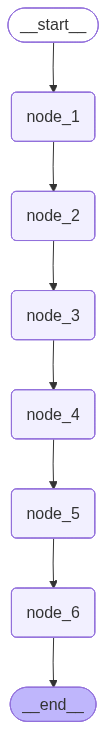

In [6]:
graph

In [7]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
  +--------+   
  | node_1 |   
  +--------+   
      *        
      *        
      *        
  +--------+   
  | node_2 |   
  +--------+   
      *        
      *        
      *        
  +--------+   
  | node_3 |   
  +--------+   
      *        
      *        
      *        
  +--------+   
  | node_4 |   
  +--------+   
      *        
      *        
      *        
  +--------+   
  | node_5 |   
  +--------+   
      *        
      *        
      *        
  +--------+   
  | node_6 |   
  +--------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   
